In [1]:
# -*- coding: utf-8 -*-
"""
Created on Sat Jun 15 16:15:15 2019

@author: mor
"""

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np



In [2]:

pd.set_option('display.max_columns', 8)




In [3]:


pollution=pd.read_csv('data/pollution.csv').sample(1000)



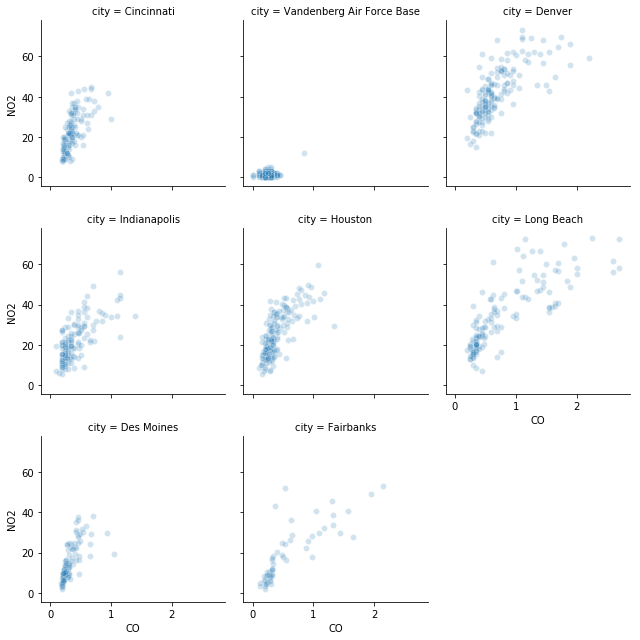

In [4]:

# Hard to read scatter of CO and NO2 w/ color mapped to city
# sns.scatterplot('CO', 'NO2',
#                 alpha = 0.2,
#                 hue = 'city',
#                 data = pollution)

# Setup a facet grid to separate the cities apart
g = sns.FacetGrid(data = pollution,
                  col = 'city',
                  col_wrap = 3)

# Map sns.scatterplot to create separate city scatter plots
g.map(sns.scatterplot, 'CO', 'NO2', alpha = 0.2)
plt.show()



C:\Users\mor\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


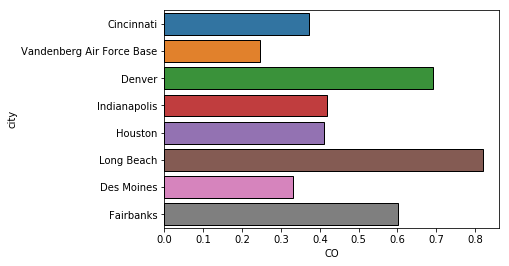

In [5]:


import numpy as np

sns.barplot(y = 'city', x = 'CO', 
            estimator = np.mean,
            ci = False,
            data = pollution,
            # Add a border to the bars
            edgecolor ='black')
plt.show()



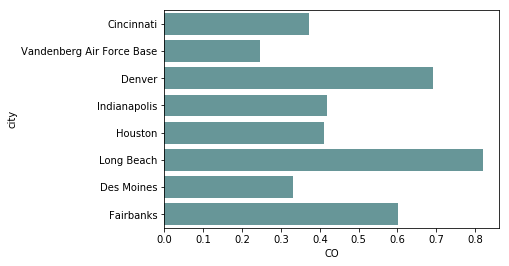

In [6]:


import numpy as np

sns.barplot(y = 'city', x = 'CO', 
            estimator = np.mean,
            ci = False,
            data = pollution,
            # Replace border with bar colors
            color = 'cadetblue')
plt.show()



In [7]:


pollution=pd.read_csv('data/pollution.csv')



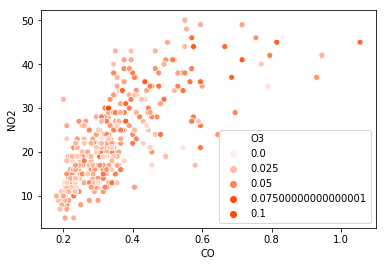

In [8]:

# Filter the data
cinci_2014 = pollution.query("city  ==  'Cincinnati' & year  ==  2014")

# Define a custom continuous color palette
color_palette = sns.light_palette('orangered',
                         as_cmap = True)

# Plot mapping the color of the points with custom palette
sns.scatterplot(x = 'CO',
                y = 'NO2',
                hue = 'O3', 
                data = cinci_2014,
                palette = color_palette)

plt.show()


In [9]:


nov2015 = pollution[['city','CO','year','month','day']].query("year  ==  2015 & month == 11")
nov2015['new_day']=nov2015['day']-nov2015['day'].min()
nov_2015_CO=nov2015.pivot_table('CO',index='city',columns='new_day')



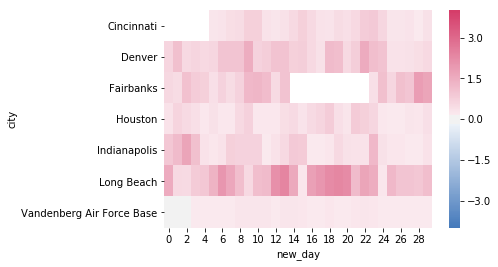

In [10]:

# Define a custom palette
color_palette = sns.diverging_palette(250, 0, as_cmap = True)

# Pass palette to plot and set axis ranges
sns.heatmap(nov_2015_CO,
            cmap = color_palette,
            center = 0,
            vmin = -4,
            vmax = 4)
plt.yticks(rotation = 0)
plt.show()



In [11]:

oct_2015 = pollution[['city','O3','year','month','day']].query("year  ==  2015 & month == 10")
oct_2015['new_day']=oct_2015['day']-oct_2015['day'].min()
oct_2015_o3=oct_2015.pivot_table('O3',index='city',columns='new_day')



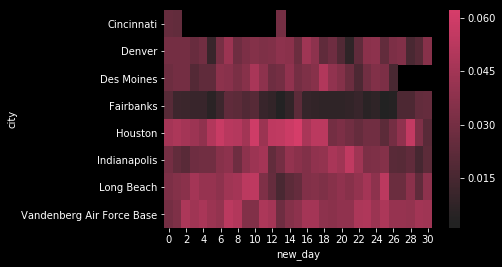

In [12]:

# Dark plot background
plt.style.use("dark_background")

# Modify palette for dark background
color_palette = sns.diverging_palette(250, 0,
                                      center = 'dark',
                                      as_cmap = True)

# Pass palette to plot and set center
sns.heatmap(oct_2015_o3,
            cmap = color_palette,
            center = 0)
plt.yticks(rotation = 0)
plt.show()



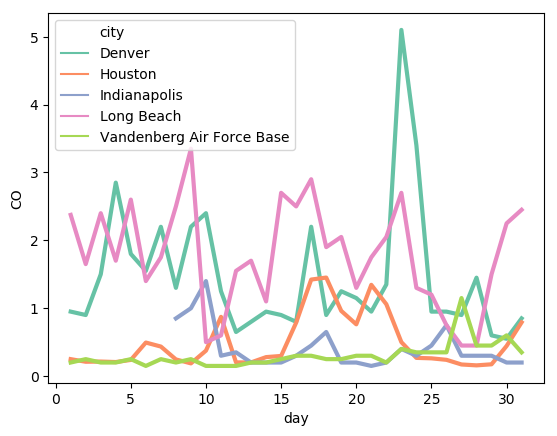

In [13]:

plt.style.use("default")

# Filter our data to Jan 2013
pollution_jan13 = pollution.query('year  ==  2013 & month  ==  1')

# Color lines by the city and use custom ColorBrewer palette
sns.lineplot(x = "day", 
             y = "CO", 
             palette = "Set2",
             hue = "city", 
             linewidth = 3,
             data = pollution_jan13)
plt.show()



In [14]:

df = pd.read_csv('data/pollution_tidy.csv')
df=df[df.year==2013]
df['city_pol']=df['city']+' '+df['pollutant']
city_pol_month=df[['city_pol','month','value']].groupby(['city_pol','month']).mean().reset_index()



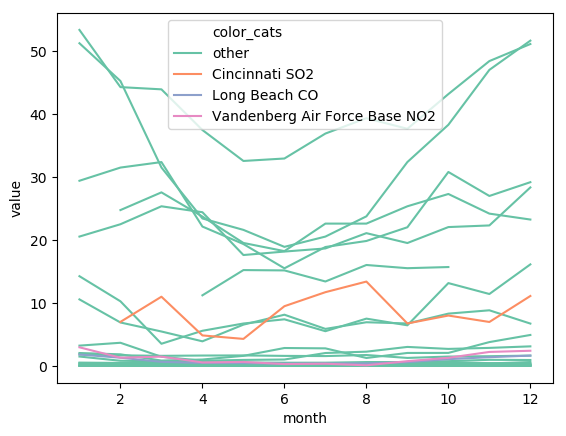

In [15]:


# Choose the combos that get distinct colors
wanted_combos = ['Vandenberg Air Force Base NO2', 'Long Beach CO', 'Cincinnati SO2']

# Assign a new column to DataFrame for isolating the desired combos
city_pol_month['color_cats'] = [x if x in wanted_combos else 'other' for x in city_pol_month['city_pol']]

# Plot lines with color driven by new column and lines driven by original categories
sns.lineplot(x = "month",
             y = "value",
             hue = 'color_cats',
             units = 'city_pol',
             estimator = None,
             palette = 'Set2',
             data = city_pol_month)
plt.show()



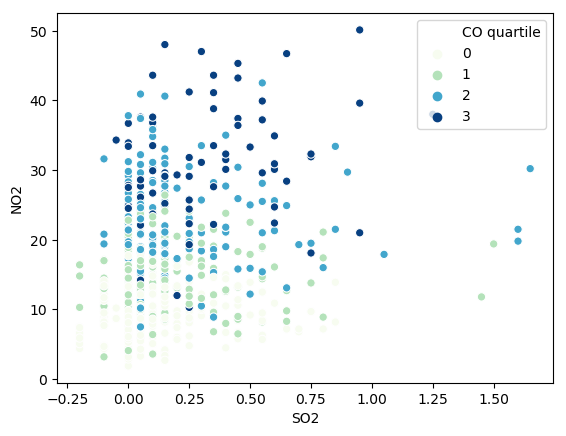

In [16]:


# Divide CO into quartiles
pollution['CO quartile'] = pd.qcut(pollution['CO'], q = 4, labels = False)

# Filter to just Des Moines
des_moines = pollution.query("city  ==  'Des Moines'")

# Color points with by quartile and use ColorBrewer palette
sns.scatterplot(x = 'SO2',
                y = 'NO2',
                hue = 'CO quartile', 
                  data = des_moines,
                palette = 'GnBu')
plt.show()



In [17]:


df = pd.read_csv('data/pollution_tidy.csv')
indices= df[['city', 'pollutant', 'year', 'value']].groupby(['city','pollutant','year'])['value'].agg(pd.Series.idxmax)

max_pollutant_values=df.iloc[indices].sort_values(['city', 'year', 'pollutant']).reset_index(drop=True)



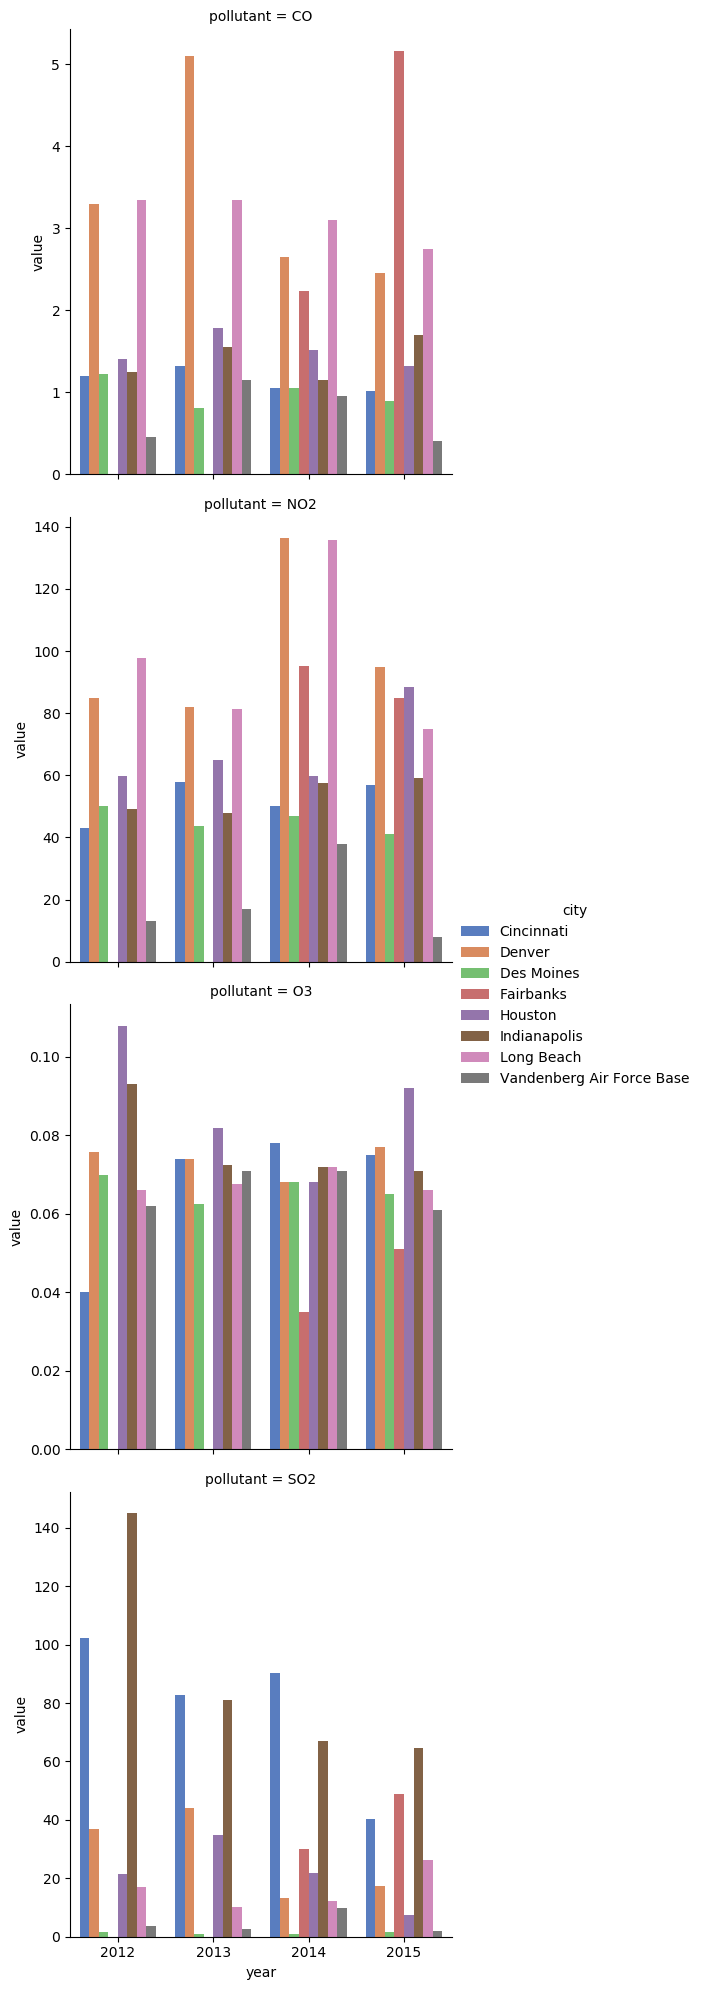

In [18]:


# Reduce to just cities in the western half of US
cities = ['Fairbanks', 'Long Beach', 'Vandenberg Air Force Base', 'Denver', 
          'Indianapolis', 'Des Moines', 'Cincinnati', 'Houston']

# Filter data to desired cities
city_maxes = max_pollutant_values[max_pollutant_values.city.isin(cities)]

# Swap city and year encodings
sns.catplot(x = 'year', hue = 'city',
              y = 'value', row = 'pollutant',    
              # Change palette to one appropriate for ordinal categories
              data = city_maxes, palette = 'muted',
              sharey = False, kind = 'bar')
plt.show()



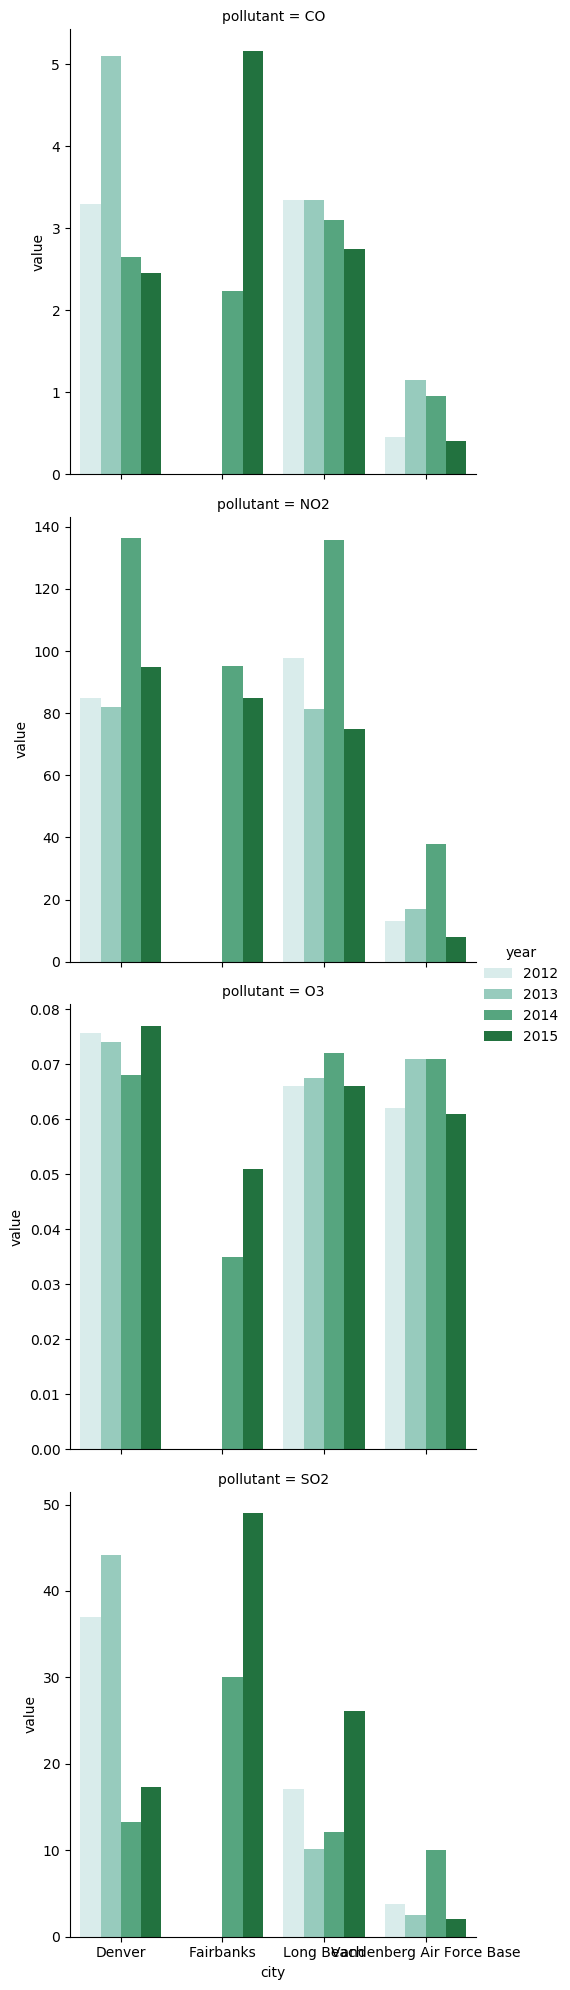

In [19]:


# Reduce to just cities in the western half of US
cities = ['Fairbanks', 'Long Beach', 'Vandenberg Air Force Base', 'Denver']

# Filter data to desired cities
city_maxes = max_pollutant_values[max_pollutant_values.city.isin(cities)]

# Swap city and year encodings
sns.catplot(x = 'city', hue = 'year',
              y = 'value', row = 'pollutant',    
              # Change palette to one appropriate for ordinal categories
              data = city_maxes, palette = 'BuGn',
              sharey = False, kind = 'bar')
plt.show()
